In this homework assignment, you are requested to implement a full backprop algorithm using only *numpy*.

- We assume sigmoid activation across all layers.
- We assume a single value in the output layer

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

The following class represents a simple feed forward network with multiple layers. The network class provides methods for running forward and backward for a single instance, throught the network. You should implement the methods (indicated with TODO), that performs forward and backward for an entire batch. Note, the idea is to use matrix multiplications, and not running standard loops over the instances in the batch.

In [ ]:

class MyNN:
  def __init__(self, learning_rate, layer_sizes):
    '''
    learning_rate - the learning to use in backward
    layer_sizes - a list of numbers, each number repreents the nuber of neurons
                  to have in every layer. Therfore, the length of the list 
                  represents the number layers this network has.
    '''
    self.learning_rate = learning_rate
    self.layer_sizes = layer_sizes
    self.model_params = {}
    self.memory = {}
    self.grads = {}
    
    # Initializing weights
    for layer_index in range(len(layer_sizes) - 1):
      W_input = layer_sizes[layer_index + 1]
      W_output = layer_sizes[layer_index]
      self.model_params['W_' + str(layer_index + 1)] = np.random.randn(W_input, W_output) * 0.1
      self.model_params['b_' + str(layer_index + 1)] = np.random.randn(W_input) * 0.1
      
      
  def forward_single_instance(self, x):    
    a_i_1 = x
    self.memory['a_0'] = x
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      z_i = np.dot(W_i, a_i_1) + b_i
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index + 1)] = a_i
      a_i_1 = a_i
    return a_i_1
  
  
  def log_loss(self, y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    m = y_hat[0]
    cost = -y[0]*np.log(y_hat[0]) - (1 - y[0])*np.log(1 - y_hat[0])
    return cost
  
  
  def backward_single_instance(self, y):
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      print(layer_index)
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      dz = (a_l_1 * (1 - a_l_1)).reshape(-1, 1) * np.dot(W_l.T, dz.reshape(-1, 1))
      # TODO-1: calculate and memorize db as well.
      db = dz #done-1 
  
  # TODO-2: update weights with grads
  def update(self): #done-2
     for layer_index in range(len(self.layer_sizes)-1):
      self.model_params['W_' + str(layer_index + 1)] -= (self.learning_rate * self.grads['dW_' + str(layer_index + 1)])
      self.model_params['b_' + str(layer_index + 1)] -= (self.learning_rate * self.grads['db_' + str(layer_index + 1)])
 
  
  # TODO-3: implement forward for a batch X.shape = (network_input_size, number_of_instance)
  def forward_batch(self, X): #done-3
    A_i_1 = X
    self.memory['A_0'] = X
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      Z_i = np.dot(W_i, A_i_1) + b_i.reshape(-1,1)
      A_i = 1/(1+np.exp(-Z_i))
      self.memory['A_' + str(layer_index + 1)] = A_i
      A_i_1 = A_i
    return A_i_1
  
  # TODO-4: implement backward for a batch y.shape = (1, number_of_instance)
  def backward_batch(self, y): #done-4
    A_output = self.memory['A_' + str(len(self.layer_sizes) - 1)]
    dZ = A_output - y
    m = (y.shape[1])
 
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      A_l_1 = self.memory['A_' + str(layer_index-1)]
      dW = (1/m)*(np.dot(dZ, A_l_1.T))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      db = dZ.T.mean(0)
      self.grads['db_' + str(layer_index)] = db
      dZ = (A_l_1 * (1 - A_l_1))* np.dot(W_l.T, dZ)
  
  # TODO-5: implement log_loss_batch, for a batch of instances
  def log_loss_batch(self, y_hat, y): #done-5
    m = y.shape[1]
    cost =  (np.dot(y, np.log(y_hat).T) + np.dot(1 - y, np.log(1 - y_hat).T))
    return cost.sum() * (-1/m)

In [ ]:
nn = MyNN(0.01, [3, 2, 1])

In [ ]:
nn.model_params

{'W_1': array([[ 0.04967142, -0.01382643,  0.06476885],
        [ 0.15230299, -0.02341534, -0.0234137 ]]),
 'W_2': array([[-0.04694744,  0.054256  ]]),
 'b_1': array([0.15792128, 0.07674347]),
 'b_2': array([-0.04634177])}

In [ ]:
x = np.random.randn(3)
y = np.random.randn(1)

y_hat = nn.forward_single_instance(x)
print(y_hat)

[0.48946]


In [ ]:
nn.backward_single_instance(y)

2
1


In [ ]:
def train(X, y, epochs, batch_size):
  '''
  Train procedure, please note the TODOs inside
  '''
  loss_per_epoch = []
  for e in range(1, epochs + 1):
    epoch_loss = 0
    X_s, y_s = shuffle(X.T, y.T)
    batches_X = np.array_split(X_s ,batch_size)  # TODO: - DONE
    batches_y = np.array_split(y_s, batch_size)


    for X_b, y_b in zip(batches_X, batches_y):
      y_hat = nn.forward_batch(X_b.T)
      epoch_loss += nn.log_loss_batch(y_hat, y_b.T)
      nn.backward_batch(y_b.T)
      nn.update()
    loss_per_epoch.append(epoch_loss / len(batches_X))
    print(f'Epoch {e}, loss={epoch_loss/len(batches_X)}')
  return loss_per_epoch


In [ ]:
# TODO-8: Make sure the following network trains properly
#done-8, work good
nn = MyNN(0.001, [6, 4, 3, 1])

X = np.random.randn(6, 100)
y = np.random.randn(1, 100)
batch_size = 8
epochs = 2

train(X, y, epochs, batch_size)

Epoch 1, loss=0.7034174436116096
Epoch 2, loss=0.6983151243233774


[0.7034174436116096, 0.6983151243233774]

#TODO: train on an external dataset

Train on the Bike Sharing dataset, using the same split as in *DL Notebook 4 - logistic regression*.
Use the following features from the data:

* temp
* atemp
* hum
* windspeed
* weekday

The response variable is, like in Notebook 4, raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"]).

The architecture of the network should be: [5, 40, 30, 10, 7, 5, 3, 1].

Use batch_size=8, and train it for 100 epochs on the train set (based on the split as requested above).

Then, plot loss per epoch.

In [ ]:
!git clone https://github.com/kfirbar/course-ml-data.git
raw = pd.read_csv('course-ml-data/Bike-Sharing-Dataset 2/day.csv')

Cloning into 'course-ml-data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 3), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [ ]:
raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
raw["cnt"].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [ ]:
raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"])

In [ ]:
batch_size = 8
epochs = 100

nn = MyNN(0.003, [5, 40, 30, 10, 7, 5, 3, 1]) #After playing a bit I saw that Learning Rate 0.003 makes the curve smoother than 0.001/0.01 :)

In [ ]:
y = raw["success"]

X = raw[["temp", "atemp", "hum", "windspeed", "weekday"]]
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Epoch 1, loss=0.6959325023014535
Epoch 2, loss=0.6957999917796989
Epoch 3, loss=0.6956995414411546
Epoch 4, loss=0.6955793573004388
Epoch 5, loss=0.6954683285124046
Epoch 6, loss=0.6953652870889095
Epoch 7, loss=0.6952591770946386
Epoch 8, loss=0.6951652043652375
Epoch 9, loss=0.6950429492662691
Epoch 10, loss=0.6949389188769175
Epoch 11, loss=0.6948499998333958
Epoch 12, loss=0.6947445011051451
Epoch 13, loss=0.6946487295311816
Epoch 14, loss=0.69457204486831
Epoch 15, loss=0.6944656412169421
Epoch 16, loss=0.694379897279249
Epoch 17, loss=0.6942852599042794
Epoch 18, loss=0.6942082930698552
Epoch 19, loss=0.6941154923230826
Epoch 20, loss=0.6940483954841619
Epoch 21, loss=0.6939699962273347
Epoch 22, loss=0.6938772048600933
Epoch 23, loss=0.6937970794208473
Epoch 24, loss=0.6937214770306751
Epoch 25, loss=0.693645487077705
Epoch 26, loss=0.6935726534323334
Epoch 27, loss=0.6935049368328203
Epoch 28, loss=0.6934329864470381
Epoch 29, loss=0.6933665668413825
Epoch 30, loss=0.6932990786

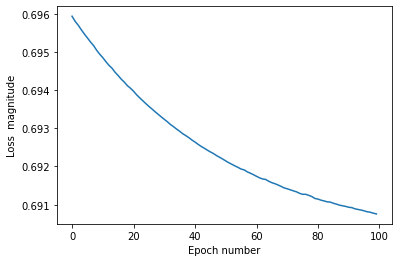

In [ ]:
X_train = np.array(X_train.T)
X_test = np.array(X_test.T)
y_train = np.array(y_train).reshape(1, -1)
y_test = np.array(y_test).reshape(1, -1)
loss_per_epoch = train(X_train, y_train, epochs, batch_size)
plt.plot(loss_per_epoch)
plt.xlabel('Epoch number')
plt.ylabel("Loss  magnitude")
plt.show()